## Media Company Case Study

Problem Statement: A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.

In [24]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
#Importing dataset
media = pd.read_csv('mediacompany.csv')
media = media.drop('Unnamed: 7',axis = 1)

In [26]:
# Exploring the top 5 rows
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [27]:
# Converting date to Pandas datetime format
media['Date'] = pd.to_datetime(media['Date']).dt.date

In [28]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [29]:
# Deriving "days since the show started"
from datetime import date

d0 = date(2017, 2, 28)
d1 = media.Date
delta = d1 - d0
media['day']= delta

In [30]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [31]:
# Cleaning days
media['day'] = media['day'].astype(str)
media['day'] = media['day'].map(lambda x: x[0:2])
media['day'] = media['day'].astype(int)

In [32]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


<AxesSubplot:xlabel='day'>

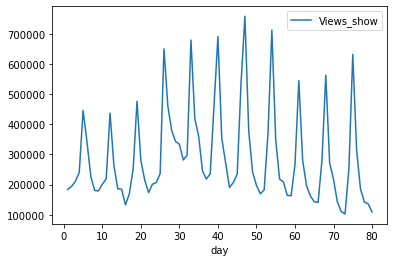

In [33]:
# days vs Views_show
media.plot.line(x='day', y='Views_show')

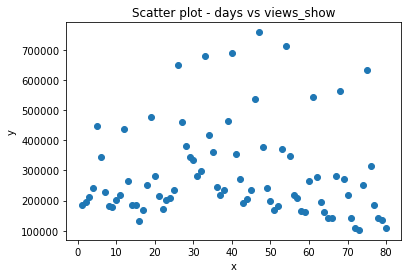

In [143]:
# Scatter Plot (days vs Views_show)
plt.scatter(media.day, media.Views_show)
plt.title('Scatter plot - days vs views_show')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

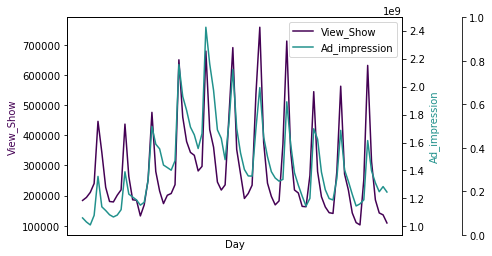

In [35]:
# plot for days vs Views_show and days vs Ad_impressions

fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("View_Show")
par1.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(media.day,media.Views_show, color=color1,label="View_Show")
p2, = par1.plot(media.day,media.Ad_impression,color=color2, label="Ad_impression")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

In [36]:
# Derived Metrics
# Weekdays are taken such that 1 corresponds to Sunday and 7 to Saturday
# Generate the weekday variable
media['weekday'] = (media['day']+3)%7
media.weekday.replace(0,7, inplace=True)
media['weekday'] = media['weekday'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


In [38]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 80 non-null     object
 1   Views_show           80 non-null     int64 
 2   Visitors             80 non-null     int64 
 3   Views_platform       80 non-null     int64 
 4   Ad_impression        80 non-null     int64 
 5   Cricket_match_india  80 non-null     int64 
 6   Character_A          80 non-null     int64 
 7   day                  80 non-null     int32 
 8   weekday              80 non-null     int32 
dtypes: int32(2), int64(6), object(1)
memory usage: 5.1+ KB


#### Running first model (lm1) Weekday & visitors 

In [39]:
# Putting feature variable to X
X = media[['Visitors','weekday']]

# Putting response variable to y
y = media['Views_show']

In [44]:
X

,const,Visitors,weekday
0,1.0,1260228,4
1,1.0,1270561,5
2,1.0,1248183,6
3,1.0,1492913,7
4,1.0,1594712,1
...,...,...,...
75,1.0,1808684,2
76,1.0,1814227,3
77,1.0,1755803,4
78,1.0,1749654,5


In [45]:
y

0     183738
1     193763
2     210479
3     240061
4     446314
       ...  
75    313945
76    185689
77    142260
78    135871
79    108961
Name: Views_show, Length: 80, dtype: int64

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [42]:
# fit the model to the training data
lm.fit(X,y)

LinearRegression()

In [46]:
import statsmodels.api as sm

X = sm.add_constant(X)
lm_1 = sm.OLS(y,X).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           8.01e-12
Time:                        14:41:02   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.720   -2.52e+05    1.75e+05
Visitors       0.2787      0.057      4.911      0.000       0.166       0.392
weekday    -3.591e+04   6591.205     -5.448      0.000    -4.9e+04   -2.28e+04
==============================================================================
Omnibus:                        2.684   Durbin-Watson:                   0.650
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                2.653
Skew:                           0.423   Prob(JB):                        0.265
Kurtosis:                       2.718   Cond. No.                     1.46e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# create Weekend variable, with value 1 at weekends and 0 at weekdays
def cond(i):
    if i % 7 == 5: return 1
    elif i % 7 == 4: return 1
    else :return 0
    return i

media['weekend']=[cond(i) for i in media['day']]

In [48]:
media.head()


,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


#### Running second model (lm2) visitors & weekend

In [49]:
# Putting feature variable to X
X = media[['Visitors','weekend']]

# Putting response variable to y
y = media['Views_show']

In [51]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_2 = sm.OLS(y,X).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           2.51e-12
Time:                        14:46:29   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.384   -2.89e+05    1.13e+05
Visitors       0.1934      0.061      3.160      0.002       0.071       0.315
weekend     1.807e+05   3.15e+04      5.740      0.000    1.18e+05    2.43e+05
==============================================================================
Omnibus:                        1.302   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.367
Skew:                           0.270   Prob(JB):                        0.505
Kurtosis:                       2.656   Cond. No.                     1.41e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Running third model (lm3) visitors, weekend & Character_A

In [52]:
# Putting feature variable to X
X = media[['Visitors','weekend','Character_A']]

# Putting response variable to y
y = media['Views_show']

In [54]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_3 = sm.OLS(y,X).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           1.53e-14
Time:                        14:47:07   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      0.613   -2.33e+05    1.38e+05
Visitors        0.1480      0.057      2.586      0.012       0.034       0.262
weekend      1.812e+05   2.89e+04      6.281      0.000    1.24e+05    2.39e+05
Character_A  9.542e+04   2.41e+04      3.963      0.000    4.75e+04    1.43e+05
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.876
Skew:                          -0.009   Prob(JB):                        0.645
Kurtosis:                       2.488   Cond. No.                     1.42e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
# Create lag variable
media['Lag_Views'] = np.roll(media['Views_show'], 1)
media.Lag_Views.replace(108961,0, inplace=True)

In [63]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


#### Running fourth model (lm4) visitors, Character_A, Lag_views & weekend

In [64]:
# Putting feature variable to X
X = media[['Visitors','Character_A','Lag_Views','weekend']]

# Putting response variable to y
y = media['Views_show']

In [65]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_4 = sm.OLS(y,X).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           3.16e-21
Time:                        10:26:18   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

<AxesSubplot:>

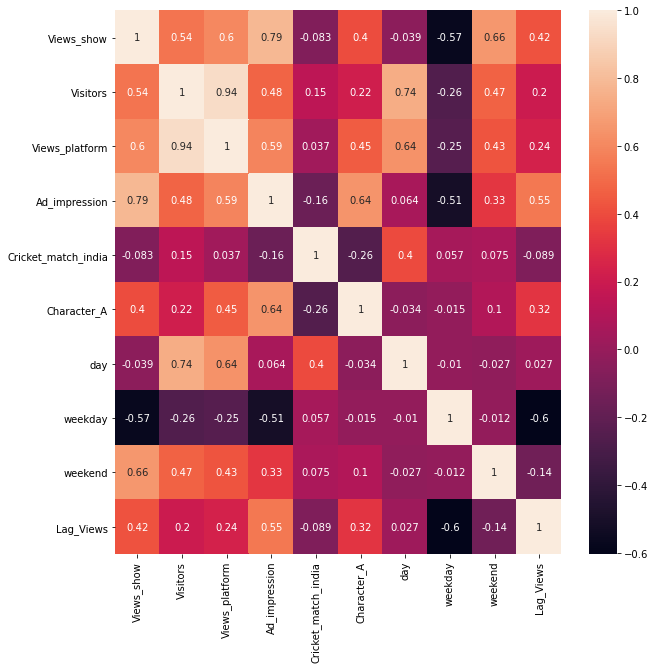

In [66]:
plt.figure(figsize = (10,10))        # Size of the figure
sns.heatmap(media.corr(),annot = True)

#### Running fifth model (lm5) Character_A, weekend & Views_platform

In [67]:
# Putting feature variable to X
X = media[['weekend','Character_A','Views_platform']]

# Putting response variable to y
y = media['Views_show']

In [68]:
import statsmodels.api as sm

X = sm.add_constant(X)
# create a fitted model in one line
lm_5 = sm.OLS(y,X).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           3.59e-15
Time:                        10:26:43   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

#### Running sixth model (lm6) Character_A, weekend & Visitors

In [69]:
# Putting feature variable to X
X = media[['weekend','Character_A','Visitors']]

# Putting response variable to y
y = media['Views_show']

In [70]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_6 = sm.OLS(y,X).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.53e-14
Time:                        10:27:37   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

#### Running seventh model (lm7) Character_A, weekend, Visitors & Ad_impressions

In [71]:
# Putting feature variable to X
X = media[['weekend','Character_A','Visitors','Ad_impression']]

# Putting response variable to y
y = media['Views_show']

In [72]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_7 = sm.OLS(y,X).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.10e-25
Time:                        10:29:00   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

#### Running eight model (lm8) Character_A, weekend & Ad_impressions

In [73]:
# Putting feature variable to X
X = media[['weekend','Character_A','Ad_impression']]

# Putting response variable to y
y = media['Views_show']

In [74]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_8 = sm.OLS(y,X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.05e-26
Time:                        10:30:25   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

In [75]:
#Ad impression in million
media['ad_impression_million'] = media['Ad_impression']/1000000

#### Running ninth model (lm9) Character_A, weekend, Visitors, ad_impressions_million & Cricket_match_india

In [76]:
# Putting feature variable to X
X = media[['weekend','Character_A','ad_impression_million','Cricket_match_india']]

# Putting response variable to y
y = media['Views_show']

In [77]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_9 = sm.OLS(y,X).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.02e-25
Time:                        10:32:07   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.633e+

#### Running tenth model (lm10) Weekend & ad_impressions_million

In [94]:
# Putting feature variable to X
X = media[['weekend','ad_impression_million']]

# Putting response variable to y
y = media['Views_show']

In [95]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_10 = sm.OLS(y,X).fit()
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     151.7
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.95e-27
Time:                        11:09:59   Log-Likelihood:                -1005.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      77   BIC:                             2023.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.302e+

#### Making predictions using lm10

In [127]:
# Making predictions using the model
X = media[['weekend','ad_impression_million']]
X = sm.add_constant(X)
Predicted_views = lm_10.predict(X)

In [128]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show, Predicted_views)
r_squared = r2_score(media.Views_show, Predicted_views)

In [129]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 4797239258.824437
r_square_value : 0.7975978797926214


Text(0, 0.5, 'Views')

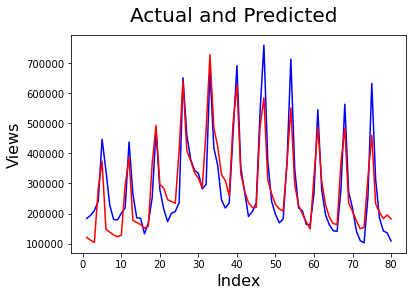

In [130]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show, color="blue", linewidth=1.5, linestyle="-")
plt.plot(c,Predicted_views, color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

Text(0, 0.5, 'Views_show-Predicted_views')

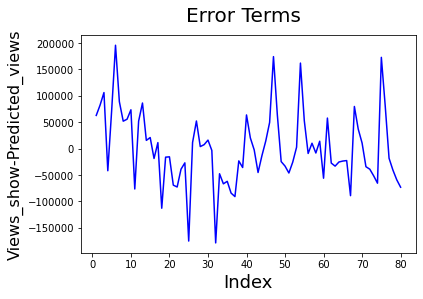

In [131]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show-Predicted_views, color="blue")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

#### Making predictions using lm6

In [132]:
# Making predictions using the model
X = media[['weekend','Character_A','Visitors']]
X = sm.add_constant(X)
Predicted_views = lm_6.predict(X)

In [133]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show, Predicted_views)
r_squared = r2_score(media.Views_show, Predicted_views)

In [134]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 9815432480.45152
r_square_value : 0.5858734080979341


Text(0, 0.5, 'Views')

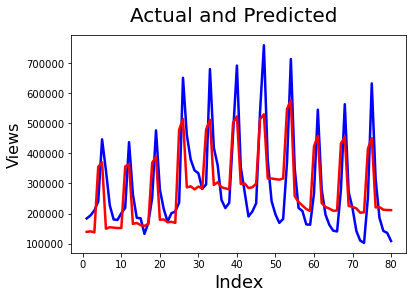

In [135]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

Text(0, 0.5, 'Views_show-Predicted_views')

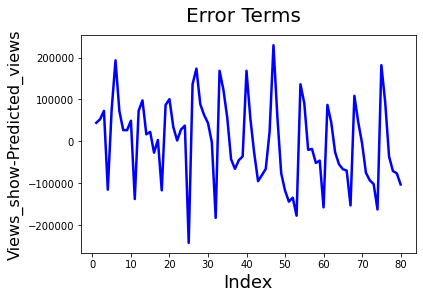

In [136]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label